조엘 그루스, 2016, 인사이트, '밑바닥부터 시작하는 데이터 과학'

In [17]:
from collections import Counter, defaultdict
from linear_algebra import dot, vector_subtract,vector_sum, vector_add
from stats import mean, correlation, standard_deviation, de_mean
from gradient_descent import minimize_batch, minimize_stochastic, maximize_batch, maximize_stochastic
from functools import partial,reduce
from machine_learning import train_test_split
from working_with_data import rescale
import math, random

#### 단순회귀분석 예시
-친구수에 따른 사이트 이용시간(x= 친구수, y= 사이트 이용시간)
>y =  βx+α+Ε  

In [18]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

outlier = num_friends.index(100) # index of outlier

'''친구수'''
num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]
'''이용시간'''
daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]
print('',num_friends_good[:2],'\n',daily_minutes_good[:2])

 [49, 41] 
 [68.77, 51.25]


In [19]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

In [20]:
'''theta = [α,β]'''
def squared_error_i(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2
def squared_error(x, y, theta):
    return sum([squared_error_i(x_i, y_i,theta) for x_i, y_i in list(zip(x,y))])

def squared_error_gradient_i(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # α의 편미분
            -2 * error(alpha, beta, x_i, y_i) * x_i] # β의 편미분
def squared_error_gradient(x, y, theta):
    return vector_sum([squared_error_gradient_i(x_i, y_i,theta) for x_i, y_i in list(zip(x,y))])

In [21]:
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error_i, 
                                  squared_error_gradient_i,
                                  num_friends_good,
                                  daily_minutes_good, 
                                  theta,
                                  0.0001)
print(alpha, beta)

22.93746417548679 0.9043371597664965


In [22]:
minimize_batch(partial(squared_error, num_friends_good,daily_minutes_good),
               partial(squared_error_gradient, num_friends_good,daily_minutes_good),
               theta,0.0001)

[22.9361134650574, 0.904845349920605]

#### 다중회귀분석 예시
-[친구수,근무시간,학위여부]에 따른 사이트 이용시간
>y = β\*x1 + β\*x2 + β\*x3 +...+ α + Ε  

beta = [alpha, beta_1, beta_2, beta_3] ->  [1, 49, 4, 0]

In [23]:
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [24]:
def predict(x_i, beta):
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

In [25]:
'''theta == beta'''
def squared_error_i(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2
def squared_error(x, y, theta):
    return sum([squared_error_i(x_i, y_i,theta) for x_i, y_i in list(zip(x,y))])

def squared_error_gradient_i(x_i, y_i, beta):
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]
def squared_error_gradient(x, y, theta):
    return vector_sum([squared_error_gradient_i(x_i, y_i,theta) for x_i, y_i in list(zip(x,y))])

In [26]:
beta_initial = [random.random() for x_i in x[0]]
minimize_stochastic(squared_error_i, 
                    squared_error_gradient_i, 
                    x, daily_minutes_good, 
                    beta_initial, 
                    0.001)  

[30.54910892864679, 0.9712114639809497, -1.8619716951802872, 0.959325904656403]

In [27]:
beta_initial = [random.random() for x_i in x[0]]
minimize_batch(partial(squared_error, x, daily_minutes_good),
               partial(squared_error_gradient, x, daily_minutes_good),
               beta_initial, 0.0001)

[30.516770671938286,
 0.975630352432654,
 -1.8627639013673403,
 0.9719801045117152]

#### 로지스틱 회귀분석 예시
y = f(xβ)+Ε
>종속변수 : 유료계정 여부(범주형, 더미변수)<br>
>독립변수 : [경력, 소득]

In [28]:
원본데이터셋= [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]

x = [[1] + list(row[:2]) for row in 원본데이터셋]
y = [row[2] for row in 원본데이터셋]

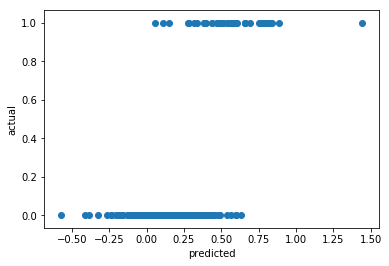

In [29]:
"""범주형 결과데이터에서 다중회귀분석을 적용했을 때 상황
   x축은 예측결과, y축은 원본결과 """
import matplotlib.pyplot as plt
%matplotlib inline
rescaled_x = rescale(x)
beta = minimize_stochastic(squared_error_i, 
                    squared_error_gradient_i, 
                    rescaled_x, y, 
                    beta_initial, 
                    0.001)
predictions = [predict(x_i, beta) for x_i in rescaled_x]
plt.scatter(predictions, y)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [30]:
def logistic(x):
    return 1.0 / (1 + math.exp(-x))

def logistic_prime(x):
    return logistic(x) * (1 - logistic(x))

In [31]:
#확률밀도함수에서 y == 1 or 0에 따른 식분배
#개별데이터의 log_likelihood 계산
def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta)))
#모든 데이터의 log_likelihood 총합
def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
               for x_i, y_i in zip(x, y))
# j번째 편미분으로 도출된 log_likelihood
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """i는 데이터 한개, j는 데이터의 편미분의 인덱스"""
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]
# 하나의 데이터에서 도출된 log_likelihood
def logistic_log_gradient_i(x_i, y_i, beta):
    """데이터 한개의 log 미분값"""
    return [logistic_log_partial_ij(x_i, y_i, beta, j)
            for j, _ in enumerate(beta)]
# 모든 데이터에서 도출된 log_likelihood 총합
def logistic_log_gradient(x, y, beta):
    return reduce(vector_add,
                  [logistic_log_gradient_i(x_i, y_i, beta)
                   for x_i, y_i in zip(x,y)])    

In [32]:
random.seed(0)
rescaled_x = rescale(x)   # 표준화한다.
x_train, x_test, y_train, y_test = train_test_split(rescaled_x, y, 0.33)
beta_0 = [1, 1, 1]
beta_hat = maximize_batch(partial(logistic_log_likelihood, x_train, y_train), 
                          partial(logistic_log_gradient, x_train, y_train), 
                          beta_0)
print(beta_hat)

[-1.906182482651773, 4.053083869373743, -3.8788953691426906]


In [33]:
'''rescaled_x'''
print("표준화 전 \n", x[1])
print("\n표준화 후(평균 0, 표준편차 1) \n", x_train[1])

표준화 전 
 [1, 1.9, 48000]

표준화 후(평균 0, 표준편차 1) 
 [1, -0.2802583178122901, -0.23814189400510025]


In [34]:
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_x, y, 0.33)
beta_0 = [1, 1, 1]
beta_hat =maximize_stochastic(logistic_log_likelihood_i,
                               logistic_log_gradient_i,
                               x_train, y_train, beta_0)
print(beta_hat)

[-1.9033596650613738, 4.048485018705759, -3.8747571420402442]


In [35]:
"""모델의 적합성 보기"""
true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(x_test, y_test):
    predict = logistic(dot(beta_hat, x_i))
    # 에측값(predict)이 0.5 이상이여야 등록한다고 가정
    if y_i == 1 and predict >= 0.5:  # TP
        true_positives += 1
    elif y_i == 1:                   # FN
        false_negatives += 1
    elif predict >= 0.5:             # FP
        false_positives += 1
    else:                            # TN
        true_negatives += 1

In [36]:
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print("정밀도: ",precision)
print("재현율: ",recall)

정밀도:  0.9333333333333333
재현율:  0.8235294117647058


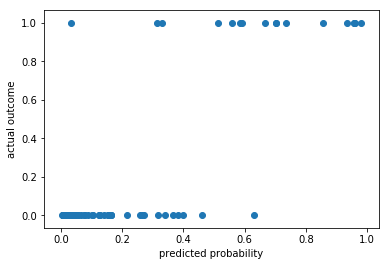

In [37]:
predictions = [logistic(dot(beta_hat, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test)
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.show()